In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import imageio as iio


ModuleNotFoundError: No module named 'cv2'

In [2]:
data_path = "/home/kalyan/DataSets/YalFaceDataSet/data/"

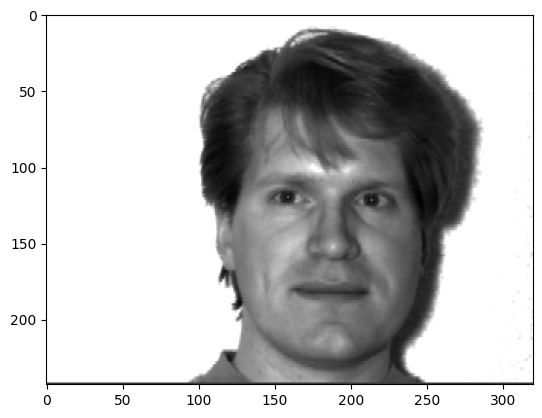

0
1


In [4]:
# Imports
from matplotlib import pyplot as plta
import numpy as np

filename = "/home/kalyan/DataSets/YaleFaceDataSet/subject01.centerlight"
pixels = plta.imread(filename)

rgb_pixels = np.stack(( pixels, pixels))
plta.imshow(pixels,cmap='gray')
plta.show()

N = rgb_pixels.shape[0]
for k in range(N):
    print(k)

In [24]:
def DFT(input):
    N = input.shape[0] 
    output = np.zeros(input.shape, dtype=complex)
    B = np.zeros(input.shape, dtype=complex)
    for k in range(N): #here k is the frequency
        for n in range(N): #here n is the time
            B[n] = np.exp(-1j*2*np.pi*k*n/N) 
        output[k] = np.sum(input*B)
    return output


In [25]:
#setting labesl for the images based on file names
def get_labels(path):
    labels = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            labels.append(filename.split(".")[0])
    return labels

labels = get_labels(data_path)
print(labels)
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)
print((labels))

['subject09', 'subject12', 'subject15', 'subject14', 'subject03', 'subject06', 'subject07', 'subject09', 'subject02', 'subject14', 'subject06', 'subject03', 'subject10', 'subject02', 'subject03', 'subject02', 'subject05', 'subject10', 'subject14', 'subject07', 'subject09', 'subject11', 'subject07', 'subject04', 'subject11', 'subject11', 'subject05', 'subject11', 'subject03', 'subject03', 'subject13', 'subject15', 'subject11', 'subject10', 'subject03', 'subject15', 'subject02', 'subject05', 'subject13', 'subject09', 'subject14', 'subject10', 'subject09', 'subject08', 'subject07', 'subject07', 'subject01', 'subject01', 'subject12', 'subject12', 'subject12', 'subject12', 'subject07', 'subject04', 'subject01', 'subject12', 'subject02', 'subject01', 'subject04', 'subject06', 'subject03', 'subject15', 'subject06', 'subject02', 'subject08', 'subject09', 'subject02', 'subject08', 'subject15', 'subject01', 'subject06', 'subject06', 'subject10', 'subject11', 'subject15', 'subject14', 'subject06'

In [26]:
def read_image(path):
    pixels = plta.imread(path)
    rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
    return rgb_pixels

images = []
for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        images.append(os.path.join(dirname, filename))

print(len(images))

165


In [27]:
dft_images = []
for image in images:
    dft_images.append(DFT(read_image(image)))
    

In [28]:
dft_images = np.array(dft_images)

In [29]:
#flatten the images
dft_images = dft_images.reshape(dft_images.shape[0], -1)


In [30]:
dft_images.shape

(165, 233280)

In [31]:
dft_images = np.real(dft_images)

In [43]:
#getting eigen vectors
def get_eigen_vectors(data):
    mean = np.mean(data, axis=0)
    data = data - mean
    cov = np.cov(data)
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    return eigen_values, eigen_vectors

eigen_values, eigen_vectors = get_eigen_vectors(dft_images)

In [44]:
eigen_values.shape

(165,)

In [57]:
#doing pca on the eigen vectors
def pca(eigen_vectors, eigen_values, n_components):
    eigen_vectors = eigen_vectors[:, :n_components]
    eigen_values = eigen_values[:n_components]
    return eigen_vectors, eigen_values

n_components = 150
eigen_vectors, eigen_values = pca(eigen_vectors, eigen_values, n_components)

In [58]:
eigen_vectors =  np.real(eigen_vectors) #taking only real part of the eigen vectors

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
from lazypredict.Supervised import LazyClassifier

In [61]:
X_trian, X_test, y_train, y_test = train_test_split(eigen_vectors, labels, test_size=0.2, random_state=42)

In [62]:
clf =  LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_trian, X_test, y_train, y_test)
print(models)


100%|██████████| 29/29 [00:02<00:00, 14.10it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
ExtraTreesClassifier               0.91               0.89    None      0.92   
RandomForestClassifier             0.85               0.85    None      0.87   
LinearDiscriminantAnalysis         0.85               0.82    None      0.86   
NuSVC                              0.79               0.81    None      0.86   
RidgeClassifier                    0.82               0.80    None      0.81   
RidgeClassifierCV                  0.82               0.80    None      0.82   
LGBMClassifier                     0.79               0.77    None      0.78   
LogisticRegression                 0.79               0.76    None      0.80   
PassiveAggressiveClassifier        0.79               0.75    None      0.78   
SVC                                0.70               0.74    None      0.78   
NearestCentroid                    0.73 

In [40]:
#saving results to csv
models.to_csv("results.csv")
